# CNN image classification - CAT and DOG
Date -> Mar 23, 2024 <br>
YT link -> https://www.youtube.com/watch?v=J1jhfAw5Uvo <br>
DataSet: https://drive.google.com/drive/folders/1dZvL1gi5QLwOGrfdn9XEsi4EnXx535bD


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

## Load Dataset

In [23]:
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')

In [24]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

# Rescale the values i.e. normalize them
X_train = X_train/255.0
X_test = X_test/255.0


In [25]:
print('Shape of X_train is :',X_train.shape)
print('Shape of Y_train is :',Y_train.shape)

print('Shape of X_test is :',X_test.shape)
print('Shape of Y_test is :',Y_test.shape)

Shape of X_train is : (2000, 100, 100, 3)
Shape of Y_train is : (2000, 1)
Shape of X_test is : (400, 100, 100, 3)
Shape of Y_test is : (400, 1)


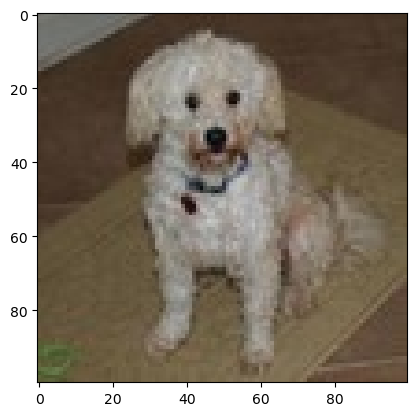

In [28]:
# Randomply displaying the image
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

## Model building

In [30]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [31]:
### Another way to define model

In [32]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
# Adding cost function and back propogation algorithm
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# other optimizer
# opt = keras.optimizers.SGD(learning_rate=0.001)
# model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [50]:
model.fit(X_train, Y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9453 - loss: 0.1681
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9545 - loss: 0.1397
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9408 - loss: 0.1563
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9793 - loss: 0.0910
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9784 - loss: 0.0840


In [51]:
# Code to evaluate model performance
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7554 - loss: 0.8086


[1.0421075820922852, 0.6924999952316284]

## Making predictions

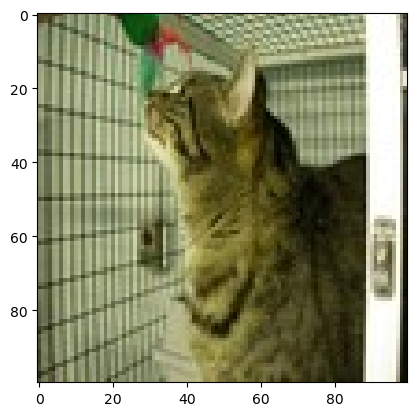

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[0.9895807]]
It is a Cat


In [56]:
idx_2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx_2, :])
plt.show()

y_pred = model.predict(X_test[idx_2,:].reshape(1,100,100,3))
print(y_pred)
if y_pred>0.5:
    print('It is a Cat')
else:
    print('It is a Dog')

Class 0: Dog<br>
Class 1: Cat<br>
Threshold : 0.5

### Saving the model

In [59]:
model.save('image_classification_CAT_DOG.hdf5')